In [1]:
pip install xgboost pandas scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 9.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [5]:
# Loading the IBM dataset
# Assume you have a CSV file with data containing 'Date' and 'Close' columns
df = pd.read_csv('IBM2017.csv')

In [6]:
# Converting 'Date' column to datetime format and sorting by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [7]:
# Creating lag features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df['Lag_3'] = df['Close'].shift(3)
df = df.dropna()

In [8]:
# Defining features (X) and target (y)
X = df[['Lag_1', 'Lag_2', 'Lag_3']]
y = df['Close']

In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initializing and training the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
# Making predictions
predictions = model.predict(X_test)

In [13]:
# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

RMSE: 0.07058883187963974


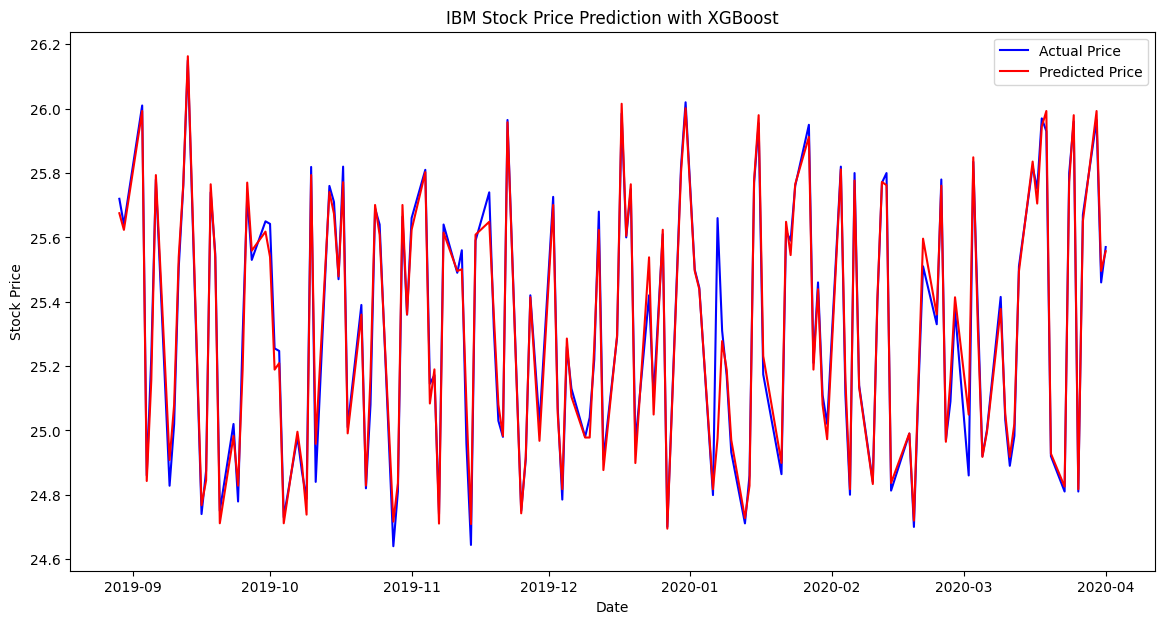

In [14]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(df['Date'][-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(df['Date'][-len(predictions):], predictions, label='Predicted Price', color='red')
plt.title('IBM Stock Price Prediction with XGBoost')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Explanation:

    Lag Features: The code creates lag features (Lag_1, Lag_2, Lag_3) to predict the current closing price based on the last three days' prices. You can adjust the number of lag days depending on your data.

    Data Splitting: The data is split into training and testing sets using an 80/20 split.

    Model Training: An XGBRegressor model is trained using the training data. The model’s parameters, such as n_estimators, learning_rate, and max_depth, are adjustable based on your specific needs.

    Prediction and Evaluation: The model makes predictions on the test set, and the Root Mean Squared Error (RMSE) is calculated to evaluate the model’s performance.

    Visualization: The actual vs. predicted stock prices are plotted to visually assess the model’s accuracy.

Adjustments:

    Lag Features: Modify the number of lag days used as features if you want to include more past data in the model.
    Model Parameters: Experiment with n_estimators, learning_rate, and max_depth to fine-tune the model’s performance.

This code provides a foundation for using XGBoost to predict stock prices.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>